<a href="https://colab.research.google.com/github/jahnavinssdasari/Machine-Learning-Projects/blob/main/Ex2KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Retail_Business/Copy of Chronic_Kidney_Dsease_data.csv')

Data exploration

In [ ]:
df.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,...,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,...,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,...,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,...,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,...,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1659 non-null   int64  
 1   Age                            1659 non-null   int64  
 2   Gender                         1659 non-null   int64  
 3   Ethnicity                      1659 non-null   int64  
 4   SocioeconomicStatus            1659 non-null   int64  
 5   EducationLevel                 1659 non-null   int64  
 6   BMI                            1659 non-null   float64
 7   Smoking                        1659 non-null   int64  
 8   AlcoholConsumption             1659 non-null   float64
 9   PhysicalActivity               1659 non-null   float64
 10  DietQuality                    1659 non-null   float64
 11  SleepQuality                   1659 non-null   float64
 12  FamilyHistoryKidneyDisease     1659 non-null   i

In [ ]:
df.describe()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
count,1659.000000,1659.000000,1659.000000,1659.00000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,...,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000
mean,830.000000,54.441230,0.515371,0.71308,0.977697,1.693189,27.620049,0.292948,9.969831,5.024247,...,3.525510,5.054869,49.730659,0.044002,0.103074,0.197107,2.000336,4.947788,5.144973,0.918626
std,479.056364,20.549757,0.499914,1.00043,0.776686,0.910611,7.288670,0.455252,5.798787,2.866274,...,2.026131,2.880460,27.827593,0.205162,0.304147,0.397934,1.141635,2.869959,2.901138,0.273492
min,1.000000,20.000000,0.000000,0.00000,0.000000,0.000000,15.033888,0.000000,0.021740,0.001186,...,0.006327,0.013697,0.087256,0.000000,0.000000,0.000000,0.001082,0.005392,0.004436,0.000000
25%,415.500000,36.000000,0.000000,0.00000,0.000000,1.000000,21.471449,0.000000,5.051156,2.555038,...,1.820793,2.532867,26.991708,0.000000,0.000000,0.000000,1.005802,2.498119,2.569561,1.000000
50%,830.000000,54.000000,1.000000,0.00000,1.000000,2.000000,27.652077,0.000000,9.951503,5.072395,...,3.572522,5.087086,48.970075,0.000000,0.000000,0.000000,2.040635,4.974069,5.182949,1.000000
75%,1244.500000,72.000000,1.000000,1.00000,2.000000,2.000000,34.015849,1.000000,14.967100,7.460563,...,5.254956,7.552093,73.913997,0.000000,0.000000,0.000000,2.947213,7.499783,7.733253,1.000000
max,1659.000000,90.000000,1.000000,3.00000,2.000000,3.000000,39.993532,1.000000,19.992713,9.998167,...,6.984636,9.998313,99.987510,1.000000,1.000000,1.000000,3.999469,9.992345,9.993754,1.000000


Dropping the column 'DoctorInCharge'

In [ ]:
df = df.drop(columns=['DoctorInCharge'])

Variance

In [ ]:
variance_values = df.var()
print("\nVariance for each column:\n", variance_values)


Variance for each column:
 PatientID                        229495.000000
Age                                 422.292533
Gender                                0.249914
Ethnicity                             1.000860
SocioeconomicStatus                   0.603242
EducationLevel                        0.829212
BMI                                  53.124714
Smoking                               0.207254
AlcoholConsumption                   33.625926
PhysicalActivity                      8.215526
DietQuality                           8.212677
SleepQuality                          2.904159
FamilyHistoryKidneyDisease            0.121227
FamilyHistoryHypertension             0.210680
FamilyHistoryDiabetes                 0.191253
PreviousAcuteKidneyInjury             0.094415
UrinaryTractInfections                0.166213
SystolicBP                          663.979219
DiastolicBP                         301.177931
FastingBloodSugar                  1336.855508
HbA1c                           

Skweness

In [ ]:
skewness_values = df.skew()
print("\nSkewness for each column:\n", skewness_values)


Skewness for each column:
 PatientID                        0.000000
Age                              0.003152
Gender                          -0.061568
Ethnicity                        1.184191
SocioeconomicStatus              0.038585
EducationLevel                  -0.220439
BMI                             -0.041887
Smoking                          0.910715
AlcoholConsumption              -0.010258
PhysicalActivity                 0.006964
DietQuality                      0.023528
SleepQuality                     0.052256
FamilyHistoryKidneyDisease       2.064379
FamilyHistoryHypertension        0.866466
FamilyHistoryDiabetes            1.110886
PreviousAcuteKidneyInjury        2.570968
UrinaryTractInfections           1.422551
SystolicBP                       0.031465
DiastolicBP                      0.011416
FastingBloodSugar                0.081009
HbA1c                            0.009469
SerumCreatinine                  0.010361
BUNLevels                       -0.007497
GFR   

Kurtosis

In [ ]:
kurtosis_values = df.kurtosis()
print("\nKurtosis for each column:\n", kurtosis_values)


Kurtosis for each column:
 PatientID                        -1.200000
Age                              -1.213112
Gender                           -1.998620
Ethnicity                         0.114254
SocioeconomicStatus              -1.340866
EducationLevel                   -0.750403
BMI                              -1.226092
Smoking                          -1.172012
AlcoholConsumption               -1.215995
PhysicalActivity                 -1.198921
DietQuality                      -1.178241
SleepQuality                     -1.150765
FamilyHistoryKidneyDisease        2.264387
FamilyHistoryHypertension        -1.250746
FamilyHistoryDiabetes            -0.766858
PreviousAcuteKidneyInjury         4.615438
UrinaryTractInfections            0.023680
SystolicBP                       -1.195452
DiastolicBP                      -1.204204
FastingBloodSugar                -1.165798
HbA1c                            -1.223625
SerumCreatinine                  -1.226538
BUNLevels                 

Checking missing values

In [ ]:
df.isnull().sum()

,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
SocioeconomicStatus,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0


Checking duplicates if any

In [ ]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")
df = df.drop_duplicates()

Number of duplicate rows: 0


Treatment for outliers

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
print(f"Number of rows before outlier treatment: {df.shape[0]}")
print(f"Number of rows after outlier treatment: {df_no_outliers.shape[0]}")

Number of rows before outlier treatment: 1659
Number of rows after outlier treatment: 374


Data Visualization

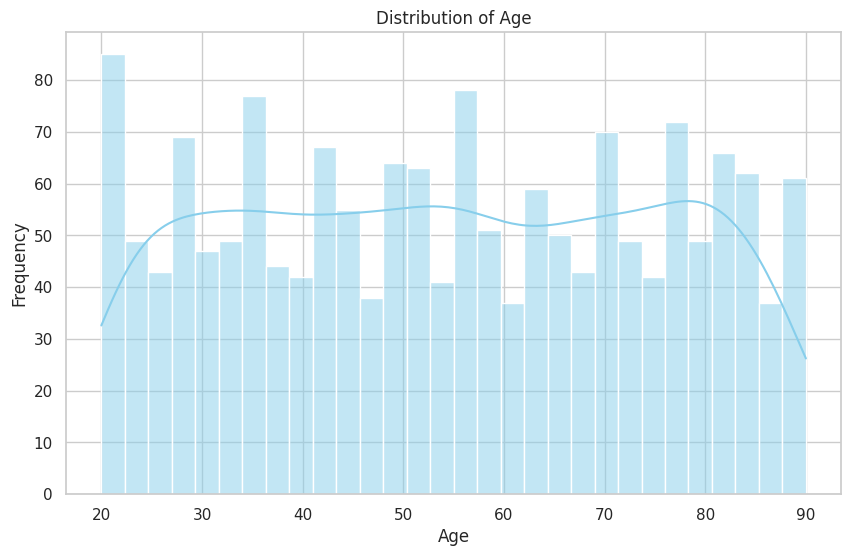

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

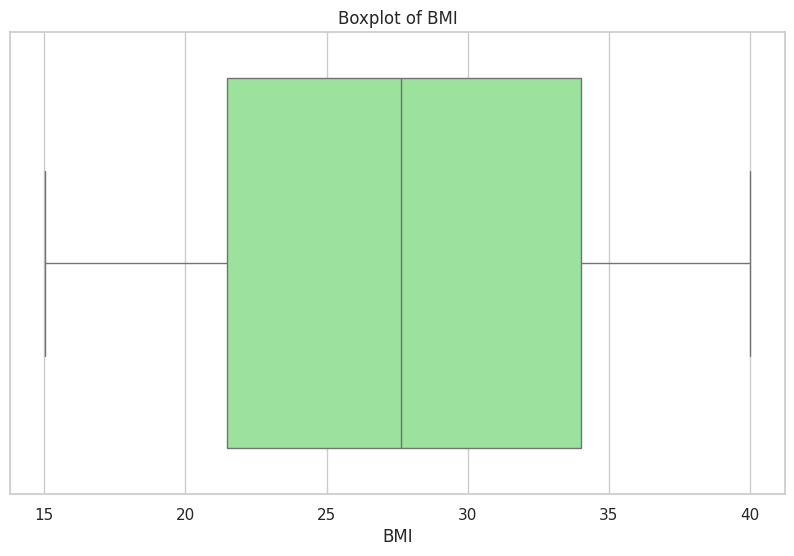

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['BMI'], color='lightgreen')
plt.title('Boxplot of BMI')
plt.xlabel('BMI')
plt.show()

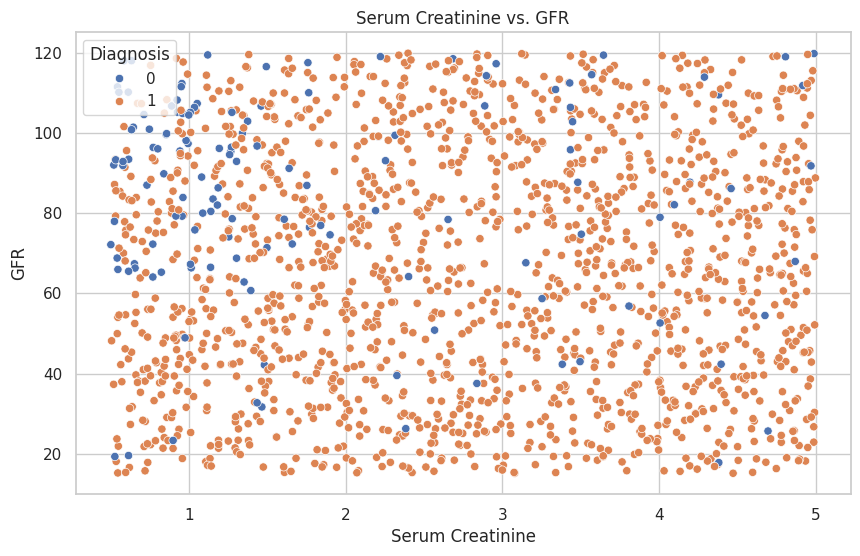

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SerumCreatinine', y='GFR', data=df, hue='Diagnosis', palette='deep')
plt.title('Serum Creatinine vs. GFR')
plt.xlabel('Serum Creatinine')
plt.ylabel('GFR')
plt.show()

<ipython-input-171-d9fdb65c1d6b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Diagnosis', y='QualityOfLifeScore', data=df, palette='muted')


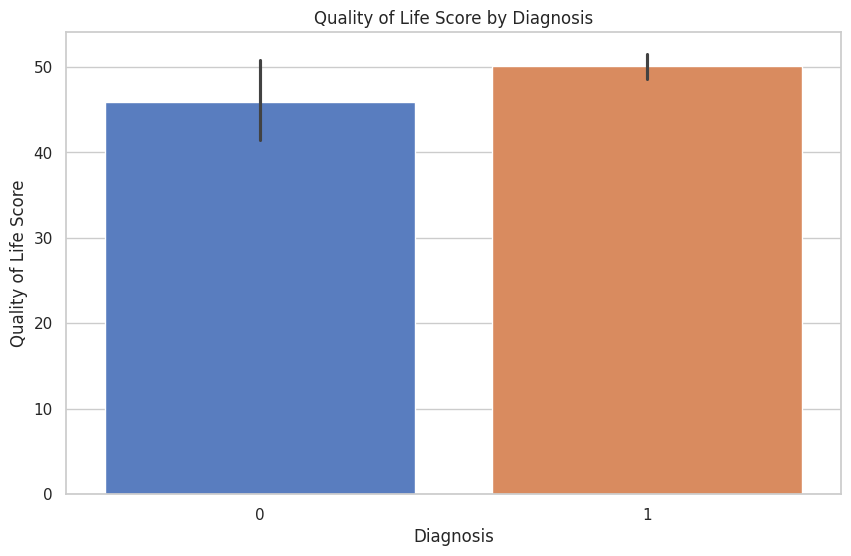

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Diagnosis', y='QualityOfLifeScore', data=df, palette='muted')
plt.title('Quality of Life Score by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Quality of Life Score')
plt.show()

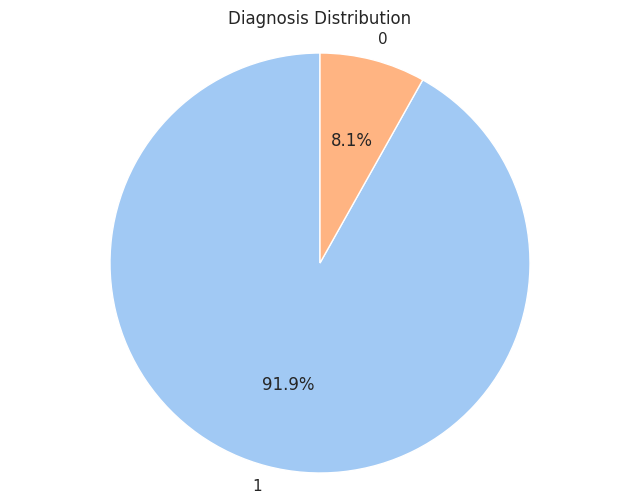

In [ ]:
diagnosis_counts = df['Diagnosis'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel", len(diagnosis_counts)))
plt.title('Diagnosis Distribution')
plt.axis('equal')
plt.show()


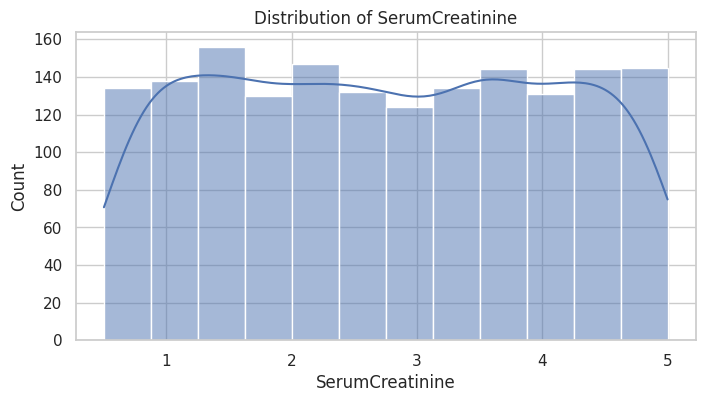

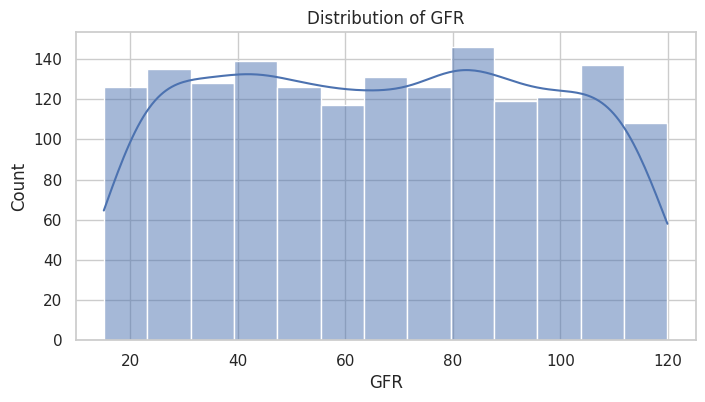

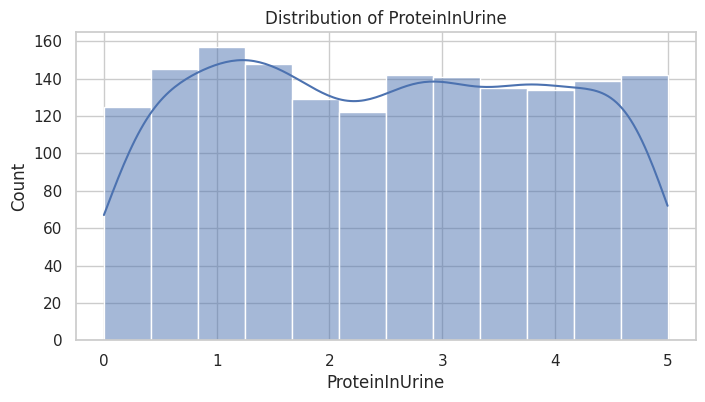

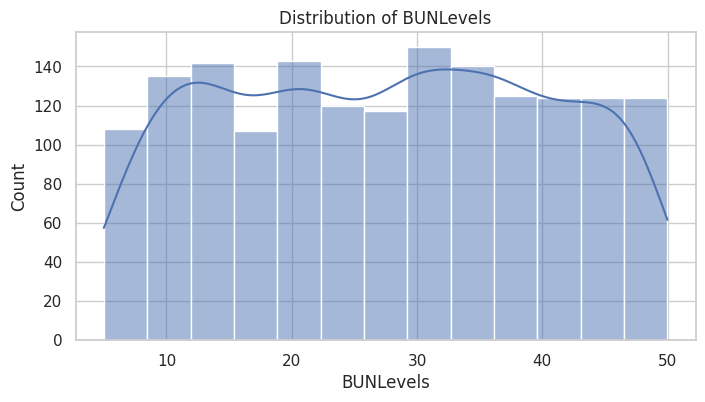

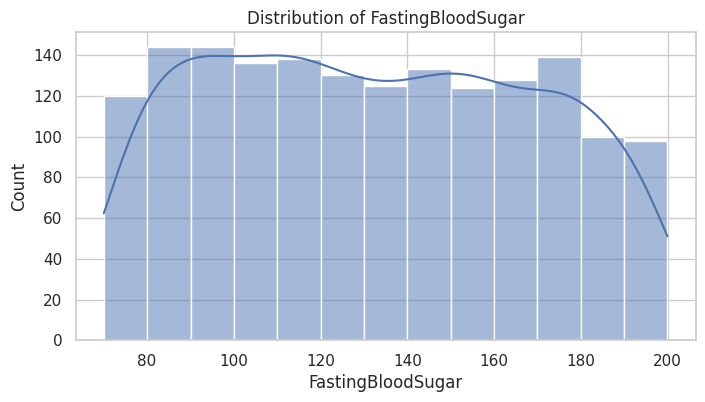

In [ ]:
# Histogram plot for top continuous features
top_features = ['SerumCreatinine', 'GFR', 'ProteinInUrine', 'BUNLevels', 'FastingBloodSugar']
for feature in top_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


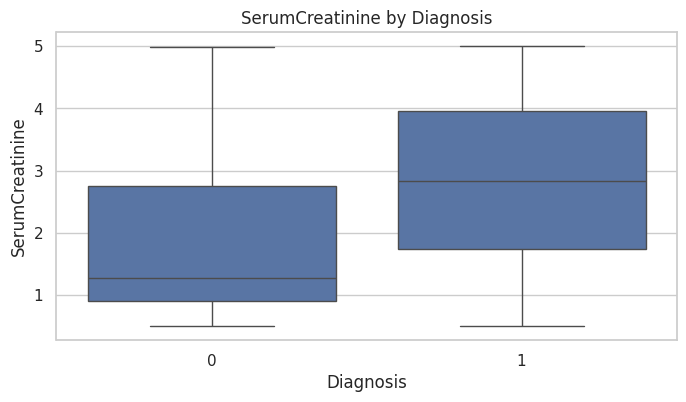

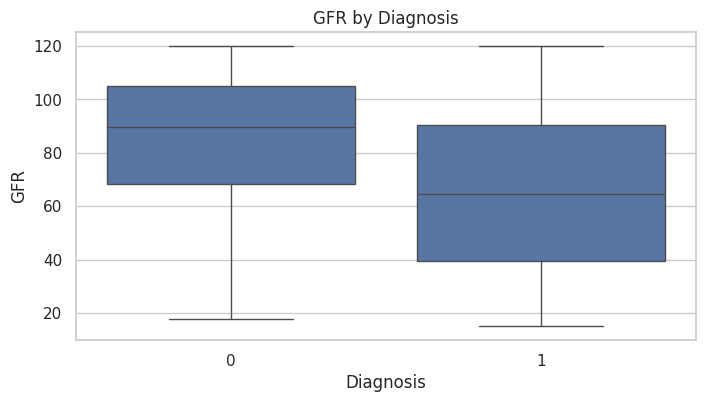

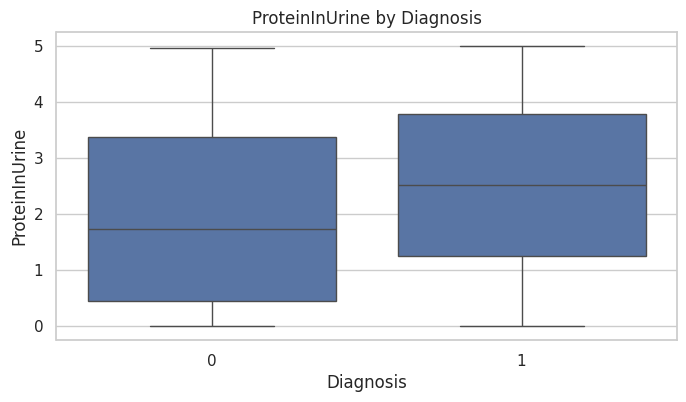

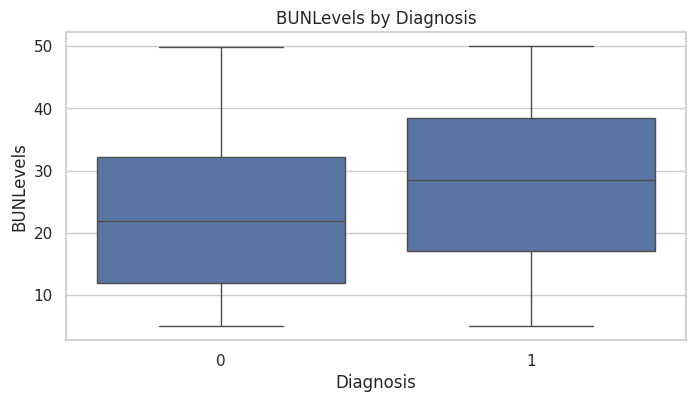

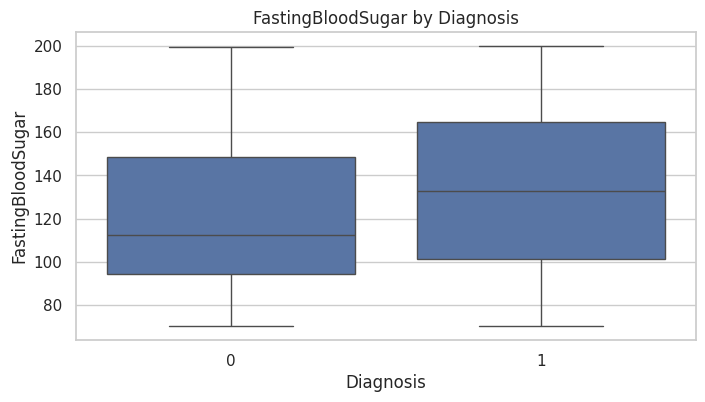

In [ ]:
# Boxplot to compare key features based on Diagnosis
for feature in top_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Diagnosis', y=feature, data=df)
    plt.title(f'{feature} by Diagnosis')
    plt.show()


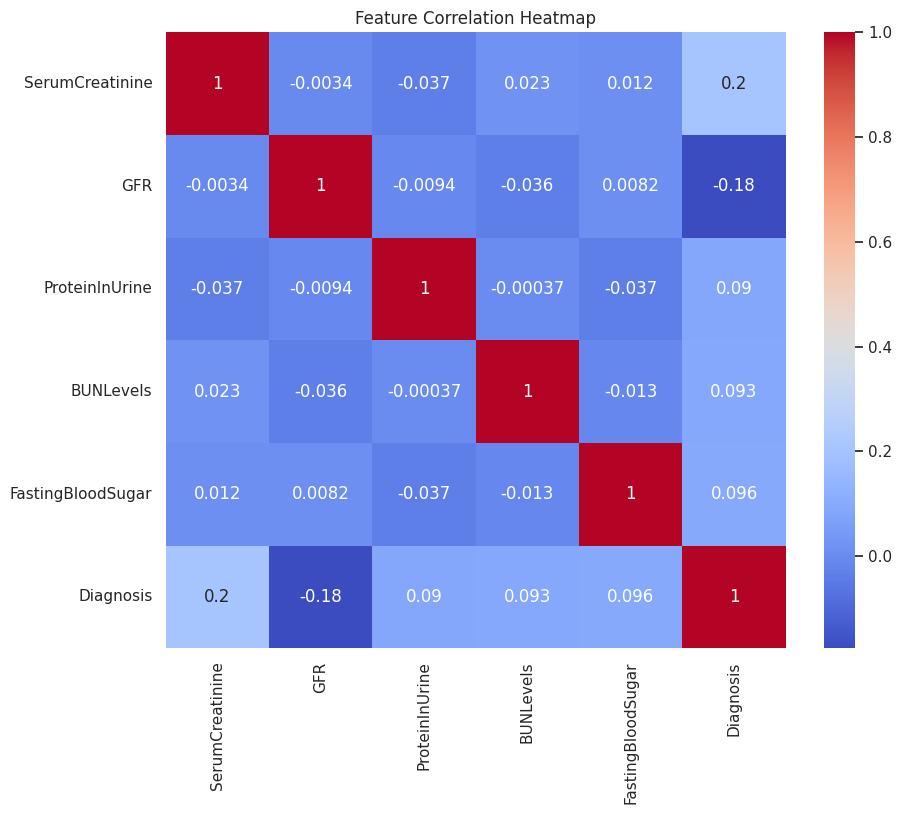

In [ ]:
# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_features + ['Diagnosis']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


Standardization



In [ ]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

Patient ID is not necessary

In [ ]:
df = df.drop(columns=['PatientID'])

Preparing the dataframe into feature matrix (X) and target variable (y)

In [ ]:
X = df.drop(columns=['Diagnosis'])  # Features
y = df['Diagnosis']

 Split the data into training and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KNN Classifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred = knn.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[  0  24]
 [  1 307]]


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.93      1.00      0.96       308

    accuracy                           0.92       332
   macro avg       0.46      0.50      0.48       332
weighted avg       0.86      0.92      0.89       332

Accuracy Score: 0.9246987951807228


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='f1')
print(f'F1 Score (Cross-Validation): {np.mean(cv_scores)}')


F1 Score (Cross-Validation): 0.9578882512171983
